<a href="https://colab.research.google.com/github/bmmukhridin/TensorFlow-Course/blob/main/Simple_Neural_Network_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from seaborn import heatmap

from sklearn.metrics import mean_absolute_error, r2_score, \
mean_squared_error, precision_score, recall_score, accuracy_score, f1_score, \
ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer

# new libraries
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense

# This is used to overcome an issue with setting up tensorflow in M1/M1 
# Suspect tensorflow-macos not very fit with GPU, use CPU only with
tf.config.set_visible_devices([], 'GPU')

# Set random seeds for consistent outcomes
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [48]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/week 11/heart - heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [49]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [50]:
df.duplicated().sum()

0

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [52]:
X = df.drop(columns="HeartDisease")
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [53]:
# create preprocessor
cat_select = make_column_selector(dtype_include='object')
num_select = make_column_selector(dtype_include='number')

scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')

num_tuple = (scaler, num_select)
cat_tuple = (ohe, cat_select)

processor = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')

In [54]:
X_train = processor.fit_transform(X_train)
X_test = processor.transform(X_test)

In [55]:
input_shape = X_train.shape[1]
input_shape

20

In [56]:
model = Sequential()

In [57]:
model.add(Dense(10, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?

model.add(Dense(5, # How many neurons you have in your second hidden layer
                activation = 'relu'))# What activation function are you using?               

In [58]:
# output layer
model.add(Dense(1, activation = "sigmoid"))

In [59]:
# compile
model.compile(loss='bce', optimizer='adam', metrics = 'accuracy')

In [60]:
# fit model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test),
                    epochs=10)

Epoch 1/10
22/22 [==============================] - 1s 9ms/step - loss: 0.7319 - accuracy: 0.5102 - val_loss: 0.7033 - val_accuracy: 0.5739
Epoch 2/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6635 - accuracy: 0.6512 - val_loss: 0.6423 - val_accuracy: 0.6957
Epoch 3/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6061 - accuracy: 0.7195 - val_loss: 0.5896 - val_accuracy: 0.7478
Epoch 4/10
22/22 [==============================] - 0s 3ms/step - loss: 0.5536 - accuracy: 0.7631 - val_loss: 0.5394 - val_accuracy: 0.7783
Epoch 5/10
22/22 [==============================] - 0s 3ms/step - loss: 0.5057 - accuracy: 0.7965 - val_loss: 0.4968 - val_accuracy: 0.7870
Epoch 6/10
22/22 [==============================] - 0s 3ms/step - loss: 0.4667 - accuracy: 0.8038 - val_loss: 0.4574 - val_accuracy: 0.7957
Epoch 7/10
22/22 [==============================] - 0s 4ms/step - loss: 0.4332 - accuracy: 0.8270 - val_loss: 0.4304 - val_accuracy: 0.8217
Epoch 8/10
22/22 [==

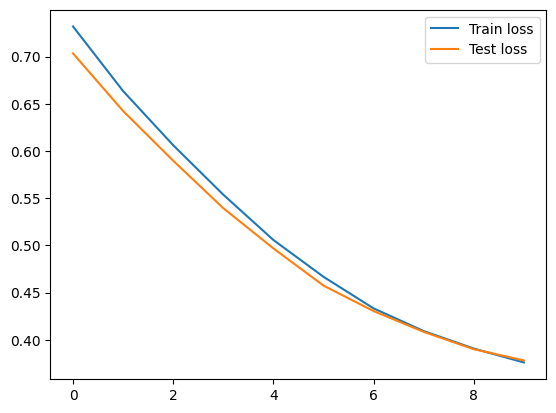

In [61]:
plt.plot(history.history['loss'], label="Train loss")
plt.plot(history.history['val_loss'], label="Test loss")
plt.legend();

8/8 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        98
           1       0.88      0.84      0.86       132

    accuracy                           0.84       230
   macro avg       0.84      0.84      0.84       230
weighted avg       0.85      0.84      0.84       230



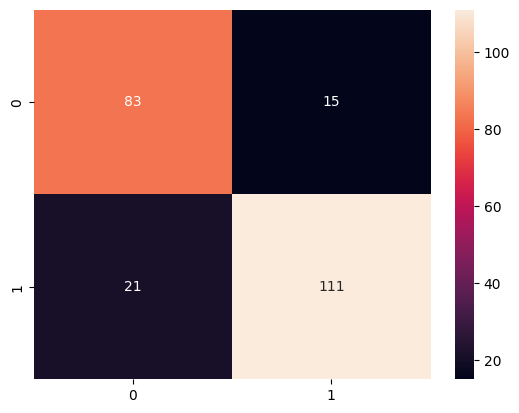

In [62]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
import seaborn as sns
# evaluate model
test_preds = model.predict(X_test).round()
print(classification_report(y_test, test_preds))
conf_mat = confusion_matrix(y_test, test_preds)
sns.heatmap(conf_mat, annot=True, fmt='g');

In [64]:
# create model
model2 = keras.Sequential()
model2.add(Dense(20, input_dim=input_shape,
          activation = 'relu'))
model2.add(Dense(5, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))

model2.compile(optimizer = 'adam', loss = 'bce', metrics = 'accuracy')

In [65]:
# train the model and save the history
history = model2.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs = 10)

Epoch 1/10
22/22 [==============================] - 2s 18ms/step - loss: 0.7084 - accuracy: 0.5422 - val_loss: 0.6569 - val_accuracy: 0.6000
Epoch 2/10
22/22 [==============================] - 0s 8ms/step - loss: 0.6142 - accuracy: 0.6977 - val_loss: 0.5748 - val_accuracy: 0.7261
Epoch 3/10
22/22 [==============================] - 0s 6ms/step - loss: 0.5422 - accuracy: 0.7834 - val_loss: 0.5034 - val_accuracy: 0.7783
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 0.4818 - accuracy: 0.8081 - val_loss: 0.4482 - val_accuracy: 0.8043
Epoch 5/10
22/22 [==============================] - 0s 6ms/step - loss: 0.4369 - accuracy: 0.8212 - val_loss: 0.4078 - val_accuracy: 0.8304
Epoch 6/10
22/22 [==============================] - 0s 5ms/step - loss: 0.4058 - accuracy: 0.8343 - val_loss: 0.3802 - val_accuracy: 0.8522
Epoch 7/10
22/22 [==============================] - 0s 4ms/step - loss: 0.3829 - accuracy: 0.8445 - val_loss: 0.3654 - val_accuracy: 0.8522
Epoch 8/10
22/22 [=

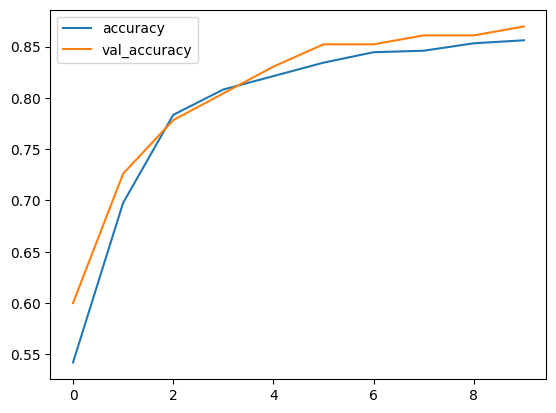

In [66]:
# plot model training history
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

8/8 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        98
           1       0.92      0.85      0.88       132

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



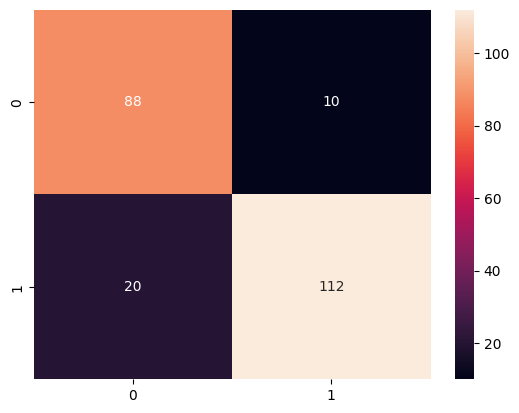

In [67]:
# evaluate the model
test_preds = model2.predict(X_test).round()
print(classification_report(y_test, test_preds))
conf_mat = confusion_matrix(y_test, test_preds)
sns.heatmap(conf_mat, annot=True, fmt = 'g');